In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from nltk.tokenize import word_tokenize

import random

import re
import nltk

from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Concatenate
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [2]:
df = pd.read_csv("counselchat-data.csv")



In [3]:
df_input = df.copy(deep= True)
df_input.head()

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0.0
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0.0
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0.0
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0.0
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0.0


In [4]:
df.drop(['questionID', 'questionUrl', 'therapistName', 'therapistUrl', 'upvotes'], axis = 1, inplace = True)

In [5]:
df.head()

,questionTitle,questionText,topics,answerText
0,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,Family Conflict,<p>What you are describing is something psycho...
1,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...","Substance Abuse,Addiction",<p>Hi. Good for you in planning ahead to do wh...
2,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",Family Conflict,<p>It sounds like keeping the secrets has beco...
3,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,"Behavioral Change,Social Relationships",<p>Hi there. It's great you are able to realiz...
4,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,Anxiety,<p>You didn't say what or how many medications...


In [6]:
df['topics'] = df['topics'].str.split(',')
df = df.explode('topics')

In [7]:
df.head()

,questionTitle,questionText,topics,answerText
0,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,Family Conflict,<p>What you are describing is something psycho...
1,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",Substance Abuse,<p>Hi. Good for you in planning ahead to do wh...
1,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",Addiction,<p>Hi. Good for you in planning ahead to do wh...
2,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",Family Conflict,<p>It sounds like keeping the secrets has beco...
3,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,Behavioral Change,<p>Hi there. It's great you are able to realiz...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   questionTitle  2590 non-null   object
 1   questionText   2455 non-null   object
 2   topics         2582 non-null   object
 3   answerText     2590 non-null   object
dtypes: object(4)
memory usage: 101.2+ KB


In [9]:
df =df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   questionTitle  2448 non-null   object
 1   questionText   2448 non-null   object
 2   topics         2448 non-null   object
 3   answerText     2448 non-null   object
dtypes: object(4)
memory usage: 95.6+ KB


Unique Values and Counts in 'topics' column:
Relationships                                                                                                                                                                    368
Anxiety                                                                                                                                                                          231
Depression                                                                                                                                                                       198
Intimacy                                                                                                                                                                         190
Family Conflict                                                                                                                                                                  176
Marriage                                          

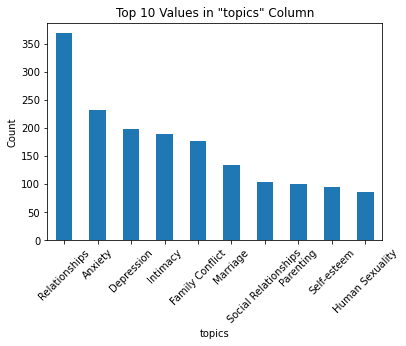

In [11]:
#plotting bar charts for unique values in tag column

unique_tags = df['topics'].unique()
unique_tag_counts = df['topics'].value_counts()
print("Unique Values and Counts in 'topics' column:")
print(unique_tag_counts)

top_n = 10 
unique_tag_counts.head(top_n).plot(kind='bar', rot=45) 
plt.title(f'Top {top_n} Values in "topics" Column')
plt.xlabel('topics')
plt.ylabel('Count')
plt.show()

In [13]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Assuming you have a DataFrame named 'df'
# Also assuming the 'clean_text' function is defined

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespaces
    text = ' '.join(text.split())
    
    return text

def remove_stopwords(text):
    # Tokenize the text
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.lower() not in stop_words]
    
    # Join the words back into a cleaned text
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Apply the combined cleaning function to all columns in the DataFrame
for column in df.columns:
    df[column] = df[column].apply(clean_text).apply(remove_stopwords)


In [14]:
df.head()

,questionTitle,questionText,topics,answerText
0,Escalating disagreements mother wife,wife mother tense disagreements past theyve mi...,Family Conflict,describing something psychologists termed tria...
1,Im addicted smoking stop,Im planning baby quit smoking hard Sometimes p...,Substance Abuse,Hi Good planning ahead whats healthiest baby T...
1,Im addicted smoking stop,Im planning baby quit smoking hard Sometimes p...,Addiction,Hi Good planning ahead whats healthiest baby T...
2,Keeping secrets family,secrets mind dont know dont want tell wife mom...,Family Conflict,sounds like keeping secrets become problem sev...
3,Underlying Causes Possessive,extremely possessive relationships hurting fri...,Behavioral Change,Hi great able realize issues going someone fee...


In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Bidirectional, Attention, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'df' with 'questionText' and 'answerText' columns
# Assuming 'df' is your DataFrame with the specified columns

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['questionText'] + ' ' + df['answerText'])
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences
max_length = 50

# Encode input sequences
question_sequences = tokenizer.texts_to_sequences(df['questionText'])
X = pad_sequences(question_sequences, maxlen=max_length, padding='post')

# Decode output sequences
answer_sequences = tokenizer.texts_to_sequences(df['answerText'])
Y = pad_sequences(answer_sequences, maxlen=max_length, padding='post')

# Convert true labels to numpy array
Y_np = np.array(Y)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_np, test_size=0.2, random_state=42)

# Define model architecture
embedding_dim = 100
latent_dim = 128

# Encoder
encoder_input = Input(shape=(max_length,))
encoder_embedding = Embedding(vocab_size, embedding_dim)(encoder_input)
encoder_lstm = Bidirectional(LSTM(latent_dim, return_sequences=True))(encoder_embedding)

# Decoder
decoder_input = Input(shape=(max_length,))
decoder_embedding = Embedding(vocab_size, embedding_dim)(decoder_input)
decoder_lstm = Bidirectional(LSTM(latent_dim, return_sequences=True))(decoder_embedding)

# Attention
attention = Attention(use_scale=True)
context = attention([decoder_lstm, encoder_lstm])

# Concatenate context with decoder_lstm output
decoder_combined_context = Concatenate(axis=-1)([decoder_lstm, context])

# Dense layer for prediction
decoder_dense = Dense(vocab_size, activation='softmax')(decoder_combined_context)

# Model
model = Model(inputs=[encoder_input, decoder_input], outputs=decoder_dense)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([X_train, X_train], Y_train, epochs=5, batch_size=32, validation_data=([X_test, X_test], Y_test))

# Save the model
model.save("counselchat.h5")




Epoch 1/5
62/62 [==============================] - 113s 2s/step - loss: 7.9185 - accuracy: 0.0872 - val_loss: 7.3751 - val_accuracy: 0.0860
Epoch 2/5
62/62 [==============================] - 110s 2s/step - loss: 7.1831 - accuracy: 0.0886 - val_loss: 7.3237 - val_accuracy: 0.0860
Epoch 3/5
62/62 [==============================] - 112s 2s/step - loss: 7.1062 - accuracy: 0.0903 - val_loss: 7.3078 - val_accuracy: 0.0887
Epoch 4/5
62/62 [==============================] - 113s 2s/step - loss: 7.0577 - accuracy: 0.0911 - val_loss: 7.2907 - val_accuracy: 0.0882
Epoch 5/5
62/62 [==============================] - 96s 2s/step - loss: 7.0157 - accuracy: 0.0919 - val_loss: 7.2868 - val_accuracy: 0.0890


In [49]:
# Load the model
loaded_model = tf.keras.models.load_model("counselchat.h5")

In [51]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the trained model
model = load_model("counselchat.h5")

# Tokenize the input sentence
input_sentence = "and i am  again asking for your help"
input_sequence = tokenizer.texts_to_sequences([input_sentence])
input_sequence = pad_sequences(input_sequence, maxlen=max_length, padding='post')

# Generate the response
decoded_sequence = model.predict([input_sequence, input_sequence])

# Convert the predicted sequence to words
predicted_words = []
for timestep in range(decoded_sequence.shape[1]):
    predicted_index = np.argmax(decoded_sequence[0, timestep, :])
    predicted_word = tokenizer.index_word.get(predicted_index, "")
    if predicted_word != '<end>':
        predicted_words.append(predicted_word)

# Join the words to form the response
generated_response = " ".join(predicted_words)
print("Generated Response:", generated_response)


1/1 [==============================] - 1s 1s/step
Generated Response: would would would would                                              
